# Modelo de Regresión Logística

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

## Cargamos los datos de entrada del archivo .csv Train

In [2]:
# Load data
train = pd.read_csv('../data/Processed/train_processed.csv', sep=',')
df_train=pd.DataFrame(train)
df_train

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,1,0,0,1,0,0,0,0,0,0
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,0,1,0,0,0,0,0,1,0,0
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,0,1,1,0,0,0,0,0,0,0
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,1,1,0,0,0,0,0,0,0
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,...,1,0,1,0,0,0,0,0,0,0
8689,9278_01,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,...,0,1,0,0,0,0,0,0,1,0
8690,9279_01,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,...,0,1,0,0,0,0,0,0,1,0
8691,9280_01,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,...,0,1,0,0,0,0,1,0,0,0


In [3]:
# Definimos las variables que me guardan los datos a entrenar separados del target 
y=df_train['Transported']

X=df_train[['PassengerId','CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Earth', 'Europa',
       'Mars', 'Cabin_num', 'Cabin_Side_P', 'Cabin_Side_S', 'Cabin_Deck_A',
       'Cabin_Deck_B', 'Cabin_Deck_C', 'Cabin_Deck_D', 'Cabin_Deck_E',
       'Cabin_Deck_F', 'Cabin_Deck_G', 'Cabin_Deck_T']]

In [4]:
#Separamos los datos 70% Train, 30% Test (Es la proporcion pedida en Kaggel)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"X_train: {X_train.shape}\ty_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\ty_test: {y_test.shape}")

X_train: (6085, 23)	y_train: (6085,)
X_test: (2608, 23)	y_test: (2608,)


In [5]:
# Creamos el modelo y lo entrenamos

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
print(model.classes_)
print(model.coef_)

[False  True]
[[ 1.18856415e-06  2.02837093e-06 -1.03032411e-05 -6.08197437e-08
  -1.52959032e-03  8.21582647e-04  6.97180384e-05 -2.39458912e-03
  -2.21678708e-03 -8.53651206e-07  7.17174296e-07  4.70035858e-08
  -3.82356438e-09 -5.63433593e-07  4.73774308e-07  9.41880622e-10
   3.94182873e-07  3.00928973e-07 -7.68183952e-08 -2.78786434e-07
  -4.95650749e-07  7.02731936e-08 -4.73062683e-09]]


In [7]:
#como ya tenemos el modelo entrenado, lo usamos sobre los datos del test para hacer la prediccion

y_hat1=model.predict(X_train)
y_hat2=model.predict(X_test)

print("ACCURACY TRAIN:", accuracy_score(y_train, y_hat1))
print("ACCURACY TEST:", accuracy_score(y_test, y_hat2))

ACCURACY TRAIN: 0.7751848808545604
ACCURACY TEST: 0.7779907975460123


In [8]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.75697865 0.79146141 0.77996716 0.77339901 0.75862069 0.76644737
 0.76151316 0.77796053 0.78618421 0.80427632]
Logistic Regression: 0.775681 (0.014604)


## Visualizamos los datos

In [9]:
import sklearn.metrics as metrics
predictions = model.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 848  441]
 [ 138 1181]]


Text(0.5, 0, 'Age')

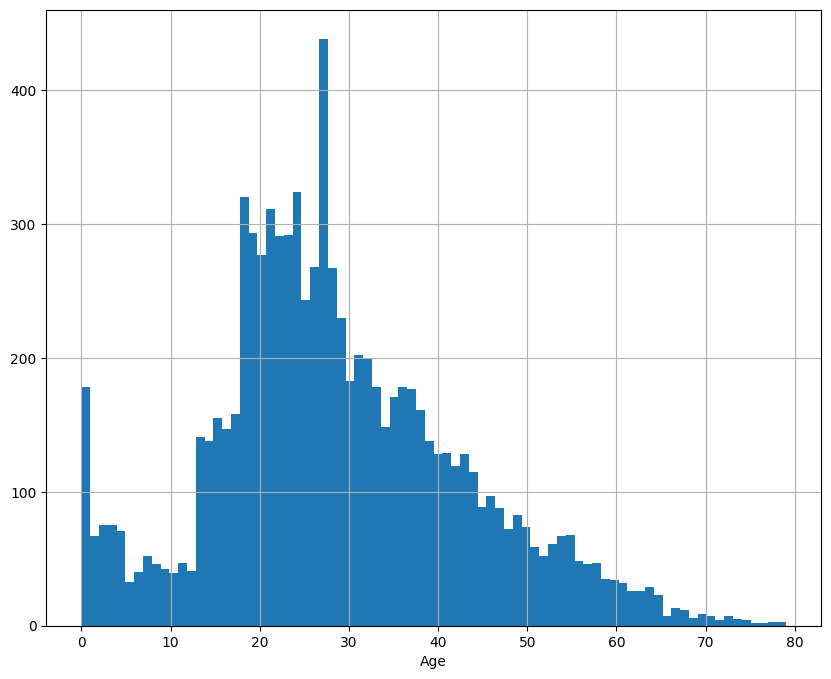

In [10]:
plt.figure(figsize=(10, 8))
df_train.Age.hist(bins=df_train.Age.nunique())
plt.xlabel('Age')

Text(0.5, 0, 'VIP')

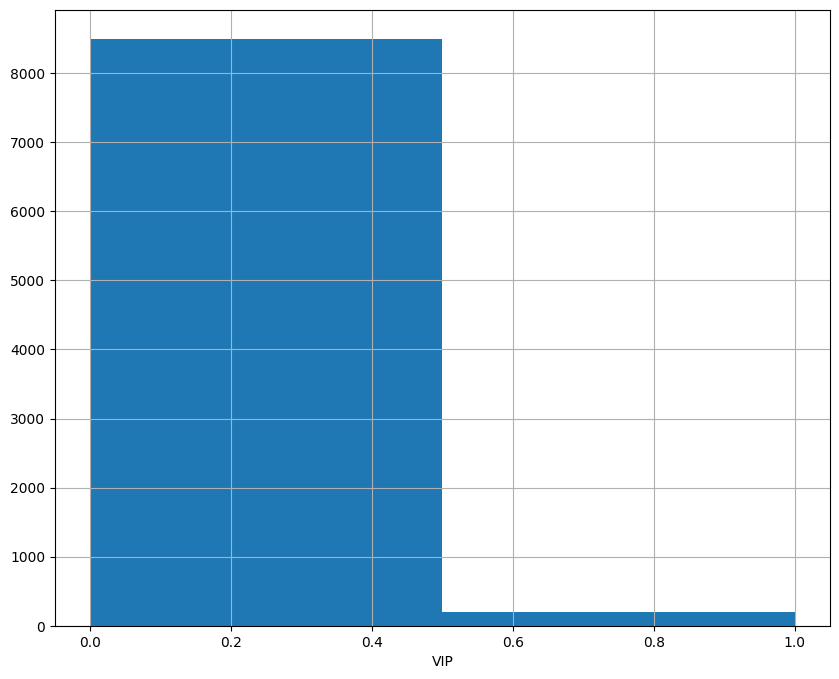

In [11]:
plt.figure(figsize=(10, 8))
df_train.VIP.hist(bins=df_train.VIP.nunique())
plt.xlabel('VIP')

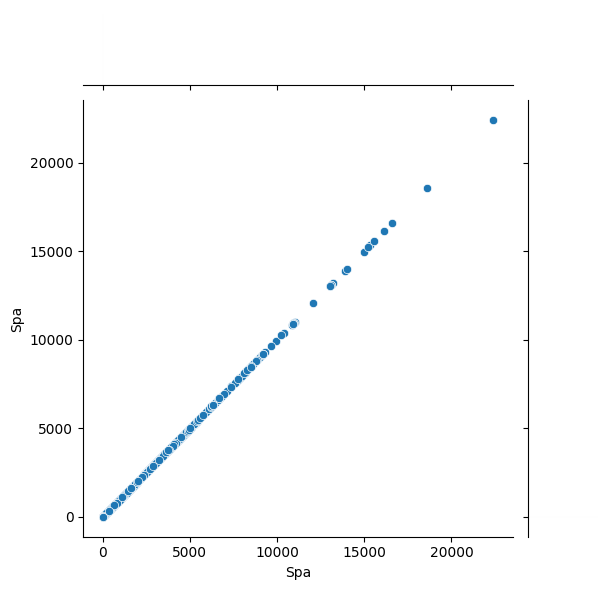

In [12]:
sns.jointplot(x=df_train["Spa"], y=df_train.Spa)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='Transported', ylabel='Count'>

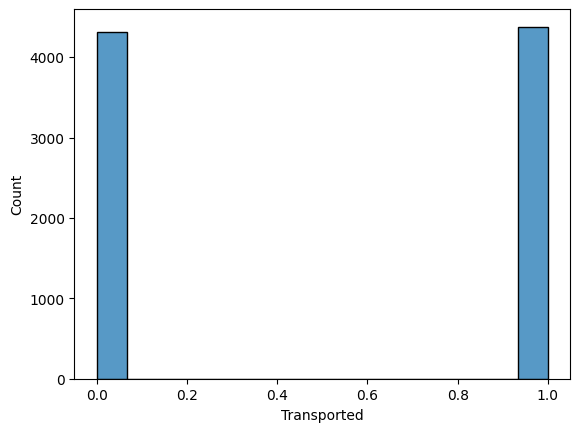

In [13]:
sns.histplot(y)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='Transported', ylabel='Count'>

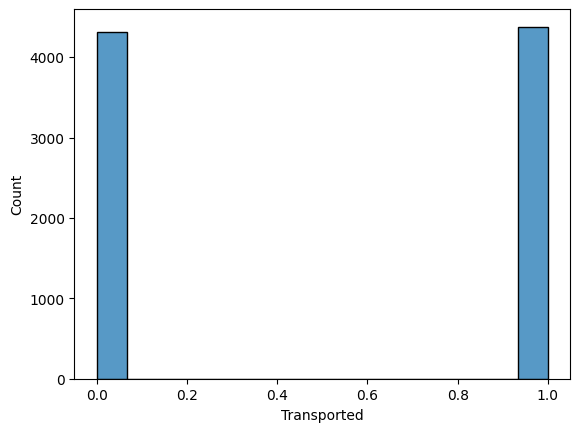

In [14]:
sns.histplot(y)

## Cargamos los datos de entrada del archivo .csv Test

In [15]:
# Load data
test = pd.read_csv('../data/Processed/test_processed.csv', sep=',')
df_test=pd.DataFrame(test)
df_test

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,Cabin_Side_P,Cabin_Side_S,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T
0,0013_01,1,27.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0018_01,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0019_01,1,31.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,1,0,0,0,0,0
3,0021_01,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,1,0,0,0,0,0
4,0023_01,0,20.0,0,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,34.0,0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
4273,9269_01,0,42.0,0,0.0,847.0,17.0,10.0,144.0,1,...,0,0,0,0,0,0,0,0,0,0
4274,9271_01,1,26.0,0,0.0,0.0,0.0,0.0,0.0,0,...,1,0,0,0,0,1,0,0,0,0
4275,9273_01,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,0,...,1,0,0,0,0,1,0,0,0,0


## Hacemos la prediccion

In [16]:
prediccion_test = pd.DataFrame(model.predict(df_test))
prediccion_test['PassengerId'] =df_test['PassengerId']
prediccion_test = prediccion_test.rename(columns = {0:'Transported'})
prediccion_test = prediccion_test[['PassengerId','Transported']]
prediccion_test.to_csv('../data/output/Regresion_Logistica.csv', index=False)
prediccion_test

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
